In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import pearsonr

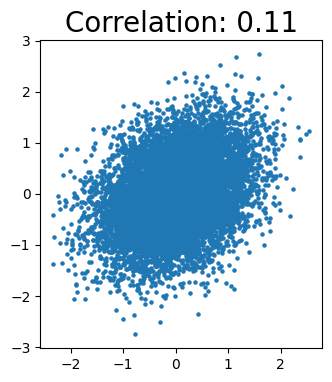

In [8]:
'''Gibbs Sampling'''
x_0 = 1.0
y_0 = -1.0
samples = {
    'x': [x_0],
    'y': [y_0]
}
num_sampled = 10_000

for _ in range(num_sampled):
    y_previous = samples['y'][-1]
    x_current  = np.random.normal(y_previous/3, scale=0.66)
    y_current  = np.random.normal(x_current/3, scale=0.66)
    samples['x'].append(x_current)
    samples['y'].append(y_current)

burn_in = 1000
# retained_samples = samples[burn_in+1:]

#皮尔逊相关系数
corr_x = round(pearsonr(samples['x'][:-1], samples['x'][1:])[0], 2)
plt.figure(figsize=(8, 4))
# ax1 = plt.subplot(121)
# ax1.scatter(retained_samples[:-1], retained_samples[1:], s=1)
# ax1.xlabel('Previous Sample', fontsize=16)
# ax1.ylabel('Current Sample', fontsize=16)
# ax1.title('Correlation: %s'%corr_x, fontsize=20)
ax2 = plt.subplot(122)
ax2.scatter(samples['x'], samples['y'], s=5)
plt.title('Correlation: %s'%corr_x, fontsize=20)
plt.show()